In [167]:

# import the necessary packages
import imutils
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("/home/pruthvirg/vertical_image.png")
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
 
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=4)
thresh = cv2.dilate(thresh, None, iterations=4)
 
# find contours in thresholded image, then grab the largest
# one
im2, contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(318, 322, 3)


In [168]:
print(contours[0])

[[[153  32]]

 [[153  34]]

 [[152  35]]

 [[152  38]]

 [[151  39]]

 [[150  39]]

 [[149  38]]

 [[149  37]]

 [[148  36]]

 [[148  35]]

 [[140  35]]

 [[138  37]]

 [[138  47]]

 [[139  48]]

 [[139  54]]

 [[140  55]]

 [[140  88]]

 [[141  89]]

 [[141  94]]

 [[142  95]]

 [[142  98]]

 [[143  99]]

 [[143 100]]

 [[146 103]]

 [[147 103]]

 [[148 104]]

 [[149 104]]

 [[151 106]]

 [[152 106]]

 [[153 107]]

 [[154 107]]

 [[156 109]]

 [[157 109]]

 [[158 110]]

 [[159 110]]

 [[161 112]]

 [[161 113]]

 [[163 115]]

 [[163 116]]

 [[164 117]]

 [[164 119]]

 [[165 120]]

 [[165 122]]

 [[166 123]]

 [[166 125]]

 [[167 126]]

 [[167 128]]

 [[168 129]]

 [[168 132]]

 [[169 133]]

 [[169 135]]

 [[170 136]]

 [[170 145]]

 [[169 146]]

 [[169 150]]

 [[168 151]]

 [[168 174]]

 [[167 175]]

 [[167 186]]

 [[166 187]]

 [[166 190]]

 [[165 191]]

 [[165 193]]

 [[164 194]]

 [[164 198]]

 [[163 199]]

 [[163 203]]

 [[162 204]]

 [[162 208]]

 [[161 209]]

 [[161 213]]

 [[160

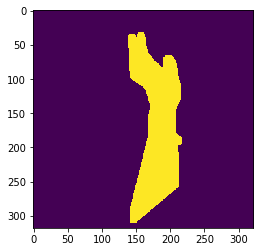

In [169]:
imgplot = plt.imshow(im2)

In [170]:
contours_list = list(contours)

In [171]:
contours_list[0][1][0]

array([153,  34], dtype=int32)

In [172]:
c = max(contours, key=cv2.contourArea)

In [173]:

# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [174]:
extTop

(153, 32)

In [175]:
extRight

(216, 195)

In [176]:

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
 
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [177]:
blank = int(extTop[1])

In [178]:
body = image[blank:-20]
neck = body[0:int(0.4*len(body))]
back = body[int(0.4*len(body)):]
full_cut = blank+int(0.4*len(body))

In [179]:
print(full_cut)

138


In [180]:
cv2.imshow("Neck",neck)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imshow("back",back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [181]:
cont_list = np.ndarray.tolist(contours[0])

In [182]:
type(cont_list[0][0])

list

In [183]:
back_point_list = []

In [184]:
len(image)

318

In [185]:
for i in cont_list:
    if i[0][1] > len(image)-20:
        break
        print("broke")
    if i[0][1] > 36:
        back_point_list.append(i[0][0])

In [186]:
back_point_list

[152,
 151,
 150,
 149,
 149,
 138,
 138,
 139,
 139,
 140,
 140,
 141,
 141,
 142,
 142,
 143,
 143,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 161,
 161,
 163,
 163,
 164,
 164,
 165,
 165,
 166,
 166,
 167,
 167,
 168,
 168,
 169,
 169,
 170,
 170,
 169,
 169,
 168,
 168,
 167,
 167,
 166,
 166,
 165,
 165,
 164,
 164,
 163,
 163,
 162,
 162,
 161,
 161,
 160,
 160,
 159,
 159,
 158,
 158,
 157,
 157,
 156,
 156,
 155,
 155,
 154,
 154,
 153,
 153,
 152,
 152,
 151,
 151,
 150,
 150,
 149,
 149,
 148,
 148,
 147,
 147,
 146,
 146,
 145,
 145,
 144,
 144,
 143,
 143,
 142,
 142,
 141]

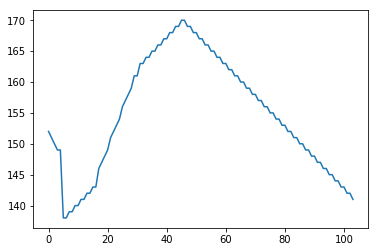

In [187]:
plt.plot(back_point_list)
    

In [188]:
statistics.stdev(back_point_list)

9.400931897302241